In [1]:
import fsc
from fsc.devices import w7x
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pyvista as pv

ModuleNotFoundError: No module named 'fsc'

In [ ]:
fsc.resolve.importOfflineData("../w7x.fsc")

In [3]:
tracer = fsc.tracer()

In [4]:
geoGrid = w7x.defaultGeometryGrid
#geometry = tracer.indexGeometry(w7x.op12Geometry(), grid = geoGrid)
#geometry
geometry = w7x.op12Geometry()

In [5]:
pvGeo = fsc.geometry.asPyvista(w7x.divertor())

In [6]:
fsc.data.writeArchive(geometry.geometry, 'geometry.fsc')

In [7]:
geoGrid = w7x.defaultGeometryGrid
geometry = fsc.Geometry(fsc.data.readArchive('geometry.fsc'))

In [8]:
archiveCoils = fsc.data.readArchive("cadCoils.fsc")
config = w7x.standard(coils = archiveCoils)
grid = w7x.defaultGrid.clone()
grid.nR = 128
grid.nZ = 128
grid.nPhi = 32

In [9]:
tracingArgs = dict(
    isotropicDiffusionCoefficient = 3e-7,
    meanFreePath = 1,
    parallelConvectionVelocity = 1,
    grid = grid,
    geometryGrid = geoGrid,
    geometry = geometry,
    distanceLimit = 1e6,
    collisionLimit = 1,
    stepSize = 0.01
)

In [10]:
points = np.linspace([6.1, 0.0, 0.0], [6.1, 0, 0], 20, axis = 1)
result = tracer.trace(points, config, **tracingArgs)

In [11]:
pvp = pv.Plotter()

resultPoints = result['endPoints'][:3]
resultPoints = fsc.flt.symmetrize(resultPoints, 5, True)
pointCloud = pv.PolyData(resultPoints.reshape([3, -1]).T)

multiGeo = pv.MultiBlock([pointCloud, fsc.geometry.asPyvista(w7x.components([165], 'TDU'))])
pvp.add_mesh(multiGeo)
pvp.show(full_screen=True)

ViewInteractiveWidget(height=1200, layout=Layout(height='auto', width='100%'), width=1920)

In [12]:
resultPoints.shape

(3, 10, 20)

In [13]:
result['endTags']

{'name': array([(text = "Divertor TDU"), (text = "Divertor TDU"),
        (text = "Divertor TDU"), (text = "Divertor TDU"),
        (text = "Divertor TDU"), (text = "Divertor TDU"),
        (text = "Divertor TDU"), (text = "Divertor TDU"),
        (text = "Divertor TDU"), (text = "Divertor TDU"),
        (text = "Divertor TDU"), (text = "Divertor TDU"),
        (text = "Divertor TDU"), (text = "Divertor TDU"),
        (text = "Divertor TDU"), (text = "Divertor TDU"),
        (text = "Divertor TDU"), (notSet = void), (text = "Divertor TDU"),
        (text = "Divertor TDU")], dtype=object),
 'w7x-component-id': array([(uInt64 = 165), (uInt64 = 167), (uInt64 = 168), (uInt64 = 167),
        (uInt64 = 166), (uInt64 = 169), (uInt64 = 167), (uInt64 = 166),
        (uInt64 = 166), (uInt64 = 169), (uInt64 = 165), (uInt64 = 167),
        (uInt64 = 167), (uInt64 = 168), (uInt64 = 166), (uInt64 = 165),
        (uInt64 = 165), (notSet = void), (uInt64 = 167), (uInt64 = 165)],
       dtype=object)}

In [14]:
result['stopReasons'] == 'collisionLimit'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True])

In [15]:
phi = 0
r1 = 5.3
r2 = 5.9
z1 = -1
z2 = -0.75
r = np.linspace(r1, r2, 120)
z = np.linspace(z1, z2, 50)

gr, gz = np.meshgrid(r, z, indexing='ij')

gx = np.cos(phi) * gr
gy = np.sin(phi) * gr

clenf = tracer.connectionLength(np.asarray([gx, gy, gz]), config, grid = grid, geometry = geometry, geometryGrid = geoGrid, distanceLimit = 1e3)
clenb = tracer.connectionLength(np.asarray([gx, gy, gz]), -config, grid = grid, geometry = geometry, geometryGrid = geoGrid, distanceLimit = 1e3)

(-1.0, -0.75)

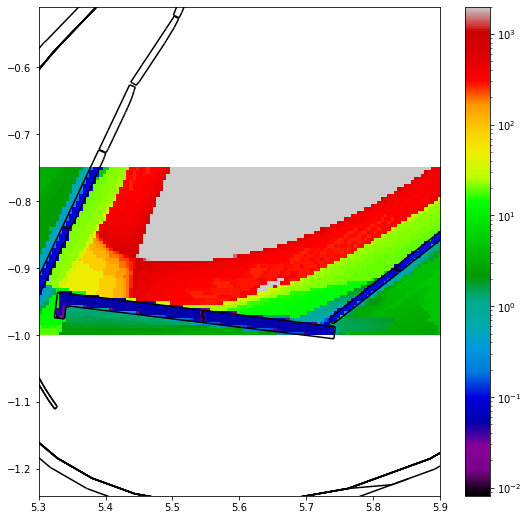

In [16]:
plt.figure(figsize = (9, 9))
plt.imshow((clenf + clenb).T[::-1], norm = matplotlib.colors.LogNorm(), extent = [r1, r2, z1, z2], cmap = 'nipy_spectral')
fsc.geometry.plotCut(geometry, phi = 0, edgecolors = 'k')
plt.colorbar()
plt.axis('equal')
plt.xlim(r1, r2)
plt.ylim(z1, z2)

In [17]:
clenf

array([[  2.33573277,   2.3105539 ,   2.27684812, ...,   1.39890937,
          1.3666639 ,   1.40737425],
       [  2.33622959,   2.30339087,   2.26996317, ...,   1.39769876,
          1.36449446,   1.32751873],
       [  2.33080094,   2.29645994,   2.26327955, ...,   1.39670402,
          1.36250955,   1.32536447],
       ...,
       [  2.50407882,   2.54848202,   2.6240894 , ..., 288.71293905,
        289.06775546, 325.45982785],
       [  2.47029009,   2.52172087,   2.58887169, ..., 288.81989303,
        288.93092775, 289.41930145],
       [  2.43194805,   2.49155495,   2.53718591, ..., 289.07514138,
        288.99387884, 289.15690576]])

In [18]:
result

{'endPoints': array([[ 4.98851441e+00, -3.96678252e+00, -4.66469973e+00,
         -3.44041046e+00,  2.37457172e+00,  5.95330531e-01,
         -3.83235628e+00,  2.50723996e+00,  1.91256185e+00,
          1.42404831e+00,  5.26744995e+00, -3.98610693e+00,
         -3.81864444e+00, -4.72035286e+00,  2.45653633e+00,
          5.19864651e+00,  5.02386249e+00, -5.47773523e+00,
         -4.18571130e+00,  5.11692143e+00],
        [-1.11944621e+00,  3.50341170e+00, -2.32389753e+00,
          3.81966451e+00,  4.63511748e+00, -5.11022531e+00,
          3.61866224e+00,  4.53139219e+00,  4.99478128e+00,
         -5.20102311e+00, -5.40760641e-01,  3.51752767e+00,
          3.62763886e+00, -1.96955261e+00,  4.54775210e+00,
         -7.39691814e-01, -1.07475143e+00, -1.42817045e+00,
          3.35451216e+00, -8.55330638e-01],
        [-9.62852049e-01, -9.68262264e-01, -9.75634390e-01,
         -9.69239363e-01, -9.73064364e-01, -9.69621716e-01,
         -9.74119469e-01, -9.75041858e-01, -9.58801286e-01,

In [22]:
points = np.linspace([6.1, 0.0, 0.0], [6.3, 0, 0], 20, axis = 1)
pcPoints = tracer.poincareInPhiPlanes(points, [0.0], 500, config, grid = grid, geometry = geometry, geometryGrid = geoGrid, distanceLimit = 1e4, stepSize = 1e-3)

In [23]:
pcPoints.shape

(5, 1, 20, 276)

In [24]:
xl, yl, zl = fsc.geometry.planarCut(geometry, phi = 0)
rl = np.sqrt(xl**2 + yl**2)

(5.133072004841275, 6.490185362471348, -1.395068977566118, 1.395068977566118)

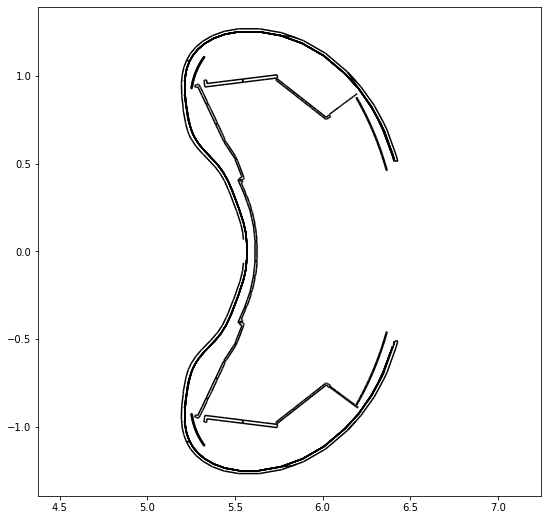

In [25]:
plt.figure(figsize = (9,9))
fsc.geometry.plotCut(geometry, phi = 0, edgecolors = 'k')
plt.axis('equal')

(-0.2, 0.2)

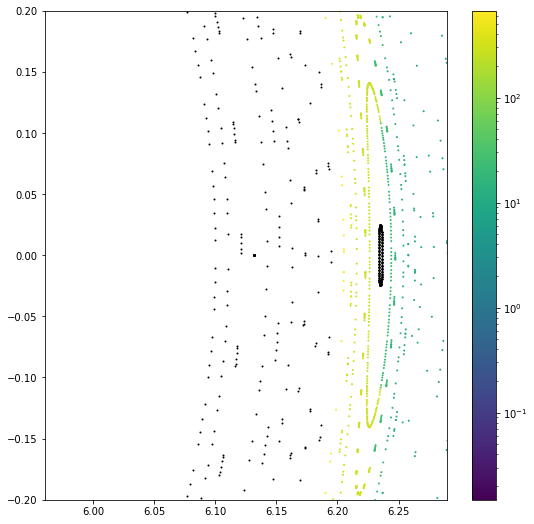

In [26]:
plt.figure(figsize = (9,9))

for v1, v2 in zip(rl, zl):
    plt.plot(v1, v2, c = "k")

x, y, z, lcf, lcb = pcPoints

lc = lcf + lcb

mask1 = np.logical_and(lcf > 0, lcb > 0)
mask2 = np.logical_and(lcf < 0, lcb < 0)

r = np.sqrt(x**2 + y**2)
plt.scatter(r[mask2], z[mask2], s = 1, c = 'k')
plt.scatter(r[mask1], z[mask1], s = 1, c = lc[mask1], norm=matplotlib.colors.LogNorm())

plt.axis('equal')
plt.colorbar()
plt.xlim(6, 6.25)
plt.ylim(-0.2, 0.2)

In [ ]:
xl.shape